# Activité numérique n°2 : résolution de l'équation de la chaleur


L’exercice consiste à résoudre l’équation de la diffusion thermique sans termes
de sources :
$$\frac{\partial T}{\partial t}=\kappa\Delta[T]\ .$$

## I - Principe de la résolution 

Il est impossible de résoudre numériquement cette équation en tout points
de l’espace. Aussi se restreint-on à un domaine de taille finie, un barreau de longueur $L$, calorifugé latéralement, modélisable par un segment. Cela revient à supposer que la température ne dépend que du temps $t$ et de la coordonnée $x$ en coordonnées cartésiennes : $T(t,x)$. L’équation de la diffusion thermique se simplifie alors
$$\frac{\partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2}\ .$$

La nature numérique de la résolution implique de discrétiser le temps et l’espace. Le barreau est représenté par un ensemble de $N_x$ points alignés, de coordonnées notées $x_i$ et régulièrement espacés : $x_i = i \times dx$, où $dx = L/N_x$ désigne le pas spatial. La température en chacun de ces points est calculée aux $N_t$ instants $t_n = n \times dt$, où $dt$ est le pas temporel.

On discrétise alors l’équation de la diffusion : comme
$$T(t,x+ dx)=T(t,x)+\left(\frac{\partial T}{\partial x}\right) dx +\left(\frac{\partial^2 T}{\partial x^2}\right)\frac{(dx)^2}{2}\ , $$
$$T(t, x-dx)=T(t,x)-\left(\frac{\partial T}{\partial x}\right)dx+\left(\frac{\partial^2 T}{\partial x^2}\right)\frac{( dx)^2}{2}\ $$
et
$$T(t+ dt,x)=T(t,x)+ dt \left(\frac{\partial T}{\partial t}\right)\ ,$$
on trouve 
$$T(t,x+dx)+T(t,x-dx)=2T(t,x)+(dx)^2\left(\frac{\partial^2 T}{\partial x^2}\right)\ ,$$
puis
$$ T(t+dt,x)  =  T(t,x)+ \kappa dt  \left(\frac{\partial^2 T}{\partial x^2}\right)\ ,$$
soit 
$$T(t+ dt,x)  =T(t,x)+ \frac{\kappa dt}{(dx)^2} [T(t,x+dx)+T(t,x-dx)-2T(t,x)]\ .$$

En notant $T (n, i) = T (t_n , x_i )$, on obtient
$$T (n + 1, i) = T (n, i) +\frac{\kappa dt}{dx^2}[[T (n, i + 1) + T (n, i − 1) − 2T (n, i)]\ .$$

On admet qu’un algorithme qui repose sur cette relation diverge dès que
$$\frac{\kappa dt}{dx^2}>\frac12\ .$$
On décide alors d’imposer
$$\frac{\kappa dt}{dx^2}=\frac13<\frac12\ ,$$
ce qui permet de fixer
$$dt=\frac{dx^2}{3\kappa}\ .$$
Par ailleurs, un régime transitoire dans un tel barreau de longueur $L$ est achevé en une durée
$$\Delta t\simeq 5\tau \simeq 5\frac{L^2}{\kappa}\ .$$
Le nombre d’instants est alors 
$$N_t=\frac{\Delta t}{dt}=\frac{5L^2}{\kappa}\frac{3\kappa}{(dx)^2}=15\left(\frac{L}{dx}\right)^2=15N_x^2\ .$$

Dans ce TP, les températures sont stockées dans un tableau à deux dimensions $N_t \times N_x$, tel que $T [n, i] = T (n, i)$ et qui constitue une variable globale.

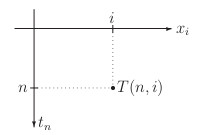
<p style="text-align: center;">Figure n°1 : représentation de la température en mémoire</p>

La résolution implique de préciser les conditions initiales, c’est-à-dire les valeurs de la température intiale en chacun des points (i.e. $T (0, i)$) ainsi que les conditions limites, c’est-à-dire la température à chaque instant aux extrémités
du barreau (soit $T (n, 0)$ et $T (n, N_x - 1)$).
Ces conditions limites peuvent être de deux sortes :

* soit ce sont les valeurs de température qui sont connues aux bords du barreau ;
* soit ce sont les valeurs du flux thermique.

Or ce flux s’écrit, dans un barreau de section d’aire $S$ :
$$\Phi_Q(t_n)  =  S\lambda\frac{\partial T}{\partial x}(t_n,x_i)=S\lambda \frac{T(t_n,x_i+ dx)-T(t_n,x_i)}{dx}\ ,$$
soit
$$\Phi_Q(t_n)  = \frac{S\lambda}{dx}[T(n,i+1)-T(n,i)]\ .$$

Au bord du barreau, cela revient à imposer les différences
$T (n, 1) − T (n, 0)$ et $T (n, N_x-2) − T (n, N_x - 1)$.
Dans ce TP, la premier exemple étudié est celui d’un barreau initialement à la température 10 °C, dont une des extrémités est portée à la température 30 °C alors que l’autre est maintenue à 10 °C.

## 2 - Travail demandé 

1. Importer les bibliothèques numpy et matplotlib en exécutant la première cellule.

In [32]:
#%%  question 1 : importations

import numpy as np
import matplotlib.pyplot as plt


2. Dans la cellule suivante, on impose une longueur $L = 1$ m, un pas spatial $dx = 1$ cm et une diffusivité $\kappa = 1$ m$^2$/s. Faire calculer $N_x$, $N_t$ et le pas temporel $dt$, puis déclarer un tableau numpy $T[n,i]$ de taille $N_x \times N_t$, initialisé à la valeur 0.

In [33]:
#%%  question 2 : définition de la grille

L=1                         # Longueur et résolution du barreau
dx=0.01                     # Pas spatial
kappa=1                     # Diffusivité

Nx=int(L/dx)                      # Calcul de la taille spatiale de la grille 


Nt=15*Nx*Nx                 # Calcul de la taille et du pas temporel  
dt=dx**2/(3*kappa)

T=np.zeros((Nt,Nx))         # initialisation de la température              


3. Dans la cellule suivante, compléter la fonction **CInit1()**, qui initialise la première ligne du tableau à la valeur 10 °C.

In [34]:
#%%  question 3 : première conditions initiales

def CInit1():
    T[0,:]=10


4. Dans la cellule suivante, compléter la fonction **CLimites1(n)**, qui fixe les conditions limites à l’instant $t_n$, c’est-à-dire aux extrémités de la $n + 1$ ème ligne du tableau.

In [35]:
#%%  question 4 : premières conditions limites sur le bord de la grille

def CLimites1(n):
    T[n,0]=30
    T[n,Nx-1]=10


5. Compléter la fonction **Iteration(n)**, qui calcule la température en tout point du barreau (y compris sur les bords) à l’instant $t_n$, étant donnée la température du barreau à l’instant $t_n−1$.

In [36]:
#%%  question 5
    
def Iteration(n) :
    for i in range(1,Nx-1):
        T[n,i]=T[n-1,i]+kappa*dt/(dx**2)*(T[n-1,i+1]+T[n-1,i-1]-2*T[n-1,i])
    CLimites1(n)

6. Ecrire une fonction **Chaleur()**, qui calcule la température en tout point du barreau et à chaque instant.

In [37]:
#%%  question 6
     
def Chaleur(): 
    CInit1()
    CLimites1(0)
    for n in range(1,Nt-1): 
        Iteration(n)

7. Dans la cellule suivante, on fait calculer la température puis représente $T (t, x)$ en fonction de $x$, pour une valeur de $t$ sur mille. Tester le programme.

In [38]:
#%%  question 7

Chaleur()
IndiceInstants=np.linspace(0,Nt-1,Nt)
Positions=dx*np.linspace(0,Nx-1,Nx)
plt.clf()
plt.ylabel(r'$T$ en °C')
plt.xlabel(r'$x$ en m')
for t in IndiceInstants[::1000]:
    plt.plot(Positions,T[int(t),:])
plt.show()

Pour accélérer les calculs, il faut utiliser les tableaux Numpy sans faire de boucles, en utilisant uniquement les fonctions du module. Par exemple :

* effectuer des opérations algébriques sur les tableaux, ce qui revient à les effectuer termes à termes ;

* le « slicing » permet d’extraire des « sous-tableaux » : ainsi, si $V[i,j]$ renvoie une seule valeur, $V[ :,j]$ renvoie la $j-1$ème colonne et V[3 :7,j]
un sous-ensemble de la $j-1$ème colonne (les élements sur les lignes numérotées de 3 à 6)

8. Remplacer la fonction **Iteration(n)** par une fonction **Iteration2(n)** effectuant la même opération, mais en supprimant les boucles, puis tester le programme.

In [30]:
#%%  question 8 : vectorisation
    
def Iteration2(n) :
    T[n,1:Nx-1]=T[n-1,1:Nx-1]+kappa*dt/(dx**2)*(T[n-1,2:Nx]+T[n-1,0:Nx-2]-2*T[n-1,1:Nx-1])
    CLimites1(n)

9. On met en œuvre un second exemple, dans laquelle la température initiale est la température finale de la situation précédente : c’est désormais une fonction affine de $x$. On calorifuge alors les deux extrémités de la barre, ce qui revient à imposer
$T (n, 0) = T (n, 1)$ et $T (n, N_x − 1) = T (n, N_x − 2)$.
Remplacer les fonctions **CInit1()** et **CLimites1(n)** par deux nouvelles
fonctions **CInit2()** et **CLimites2(n)**, permettant d’imposer respective ment la nouvelle condition initiale et les nouvelles conditions aux limites.

In [12]:
#%%  question 9 : deuxième exemple

def CInit2():
    for i in range(Nx):
        T[0,i]=30-20*i/Nx

def CLimites2(n):
    T[n,0]=T[n,1]
    T[n,Nx-1]=T[n,Nx-2]

10. D’autres exemples peuvent ensuite être examinés :

* la fonction **CLimites3(n)** utilisée avec la fonction **CInit1()** permet de regarder le cas d’une barre initialement à 10 °C, calorifugée en $x = L$ et dont l’autre extrémité est portée à 30 °C ;

* les fonctions **CLimites4(n)** et **CInit4()** présentent la situation d’une barre initialement à 30 °C, dont l’extrémité en $x = 0$ reste à cette température, mais dont l’autre extrémité est au contact d’un fluide à 10 °C (on emploie alors la loi de Newton pour traiter la condition limite).

In [16]:
#%%  Autres conditions initiales ou limites sur le bord de la grille
 
def CLimites3(n):
    T[n,0]=30
    T[n,Nx-1]=T[n,Nx-2]
    
    
def CInit4():
    T[0,:]=30
    
 
def CLimites4(n):
    T[n,0]=30
    if not(n==0):
        T[n,Nx-1]=T[n,Nx-2]-0.05*(T[n-1,Nx-1]-10)